In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn import tree 

In [2]:
path = r'E:\\学业\\IPS\\组会\\task_2\\03_trainingData_B1.csv'

In [3]:
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')

In [4]:
train_df = pd.read_csv(path, header=0)

In [5]:
train_df = train_df[:]

In [6]:
train_df = train_df.replace('*',-110)

In [7]:
train_df['label']=0

C:\Users\Codex\AppData\Local\Temp\ipykernel_20324\2720751214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['label']=0


In [8]:
train_df

,ID,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,checkSum,label
0,1,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911162,1:-7685.72349999845:4864929.89029999,0
1,2,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911145,1:-7685.72349999845:4864929.89029999,0
2,3,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911148,1:-7685.72349999845:4864929.89029999,0
3,4,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911151,1:-7685.72349999845:4864929.89029999,0
4,5,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911155,1:-7685.72349999845:4864929.89029999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,5244,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054764,4:-7587.10229999944:4864986.09099999,0
5244,5245,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5245,5246,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5246,5247,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0


In [9]:
#手动打标签，如果是坐标轴右上方的为标签1，左下方的为标签0

train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0



C:\Users\Codex\AppData\Local\Temp\ipykernel_20324\207508054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
C:\Users\Codex\AppData\Local\Temp\ipykernel_20324\207508054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0


In [10]:
train_df

,ID,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,checkSum,label
0,1,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911162,1:-7685.72349999845:4864929.89029999,1
1,2,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911145,1:-7685.72349999845:4864929.89029999,1
2,3,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911148,1:-7685.72349999845:4864929.89029999,1
3,4,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911151,1:-7685.72349999845:4864929.89029999,1
4,5,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911155,1:-7685.72349999845:4864929.89029999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,5244,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054764,4:-7587.10229999944:4864986.09099999,0
5244,5245,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5245,5246,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5246,5247,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0


In [11]:
train_df_features = scale(np.asarray(train_df.iloc[:,1:201]).astype(float), axis =1)

In [12]:
train_df_features

array([[-0.18598672, -0.18598672,  3.40323073, ..., -0.18598672,
        -0.18598672, -0.18598672],
       [-0.18880777, -0.18880777,  3.31327191, ..., -0.18880777,
        -0.18880777, -0.18880777],
       [-0.1808101 , -0.1808101 ,  3.46856804, ..., -0.1808101 ,
        -0.1808101 , -0.1808101 ],
       ...,
       [-0.30761921, -0.30761921, -0.30761921, ..., -0.30761921,
        -0.30761921, -0.30761921],
       [-0.30633779, -0.30633779, -0.30633779, ..., -0.30633779,
        -0.30633779, -0.30633779],
       [-0.30601396, -0.30601396, -0.30601396, ..., -0.30601396,
        -0.30601396, -0.30601396]])

In [13]:
train_df_label = np.asarray(train_df.iloc[:,211:212])

In [14]:
train_df_label

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df_label,test_size=0.3)

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [17]:
clf = clf.fit(X_train,y_train)

In [18]:
score = clf.score(X_test,y_test)

In [19]:
score

0.9949206349206349

In [20]:
train_df.columns[1:201]

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP191', 'WAP192', 'WAP193', 'WAP194', 'WAP195', 'WAP196', 'WAP197',
       'WAP198', 'WAP199', 'WAP200'],
      dtype='object', length=200)

In [21]:
'''
import graphviz
feature_name = train_df.columns[1:201]
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                ,random_state=30
                                ,splitter="random"
                                ,max_depth=3
                                ,min_samples_leaf=10
                                ,min_samples_split=10
                                )

clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["左上角","右下角"]
                                ,filled=True
                                ,rounded=True
                                )
#dot_data.replace('helvetica','"Microsoft YaHei"'), encoding='utf-8'
graph = graphviz.Source(dot_data.replace('helvetica','"Microsoft YaHei"'), encoding='utf-8')
graph.view()
'''

Error: Source.gv: syntax error in line 2 near 'YaHei'


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'Source.gv']' returned non-zero exit status 1. [stderr: b"Error: Source.gv: syntax error in line 2 near 'YaHei'\r\n"]

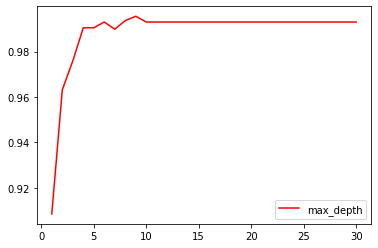

In [22]:
test = []
for i in range(30):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )

    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,31),test,color="red",label="max_depth")
plt.legend()
plt.show()
